<a href="https://colab.research.google.com/github/hasan5352/image-recognition-Cats-v-Dogs/blob/main/catVSdogCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drectory Set Up**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# **Imports**

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import tensorflow as tf
from keras import layers, models
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import cv2
import imghdr

In [ ]:
np.sqrt(7)

2.6457513110645907

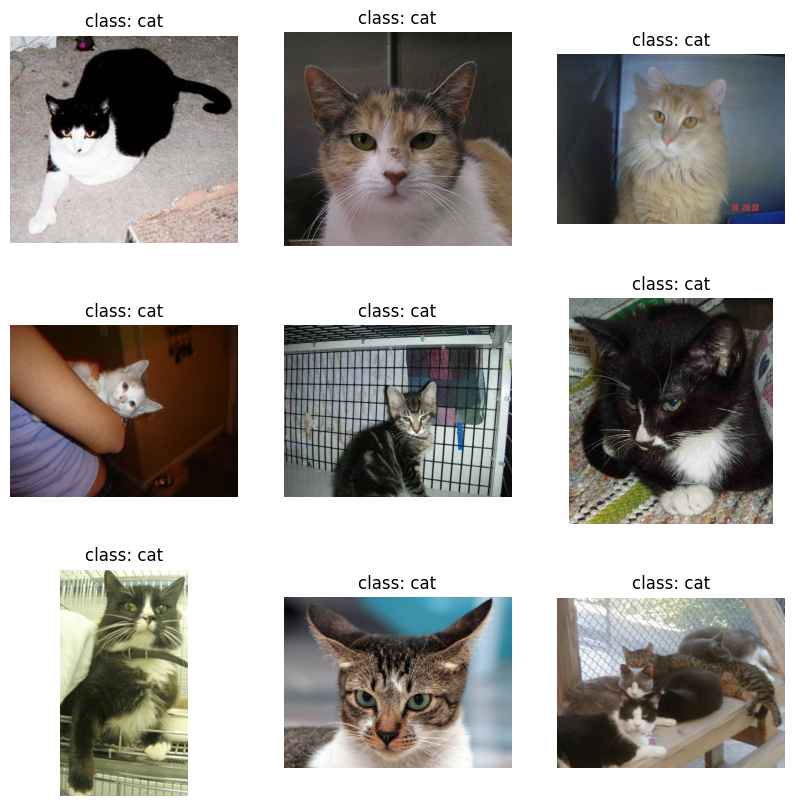

In [ ]:
def plot_images_from_dir(path, animal_class, num_imgs=9):
    img_filenames = os.listdir(path)

    if len(img_filenames) < num_imgs:
        print(f"Only found {len(img_filenames)} images in {path}.")
        num_imgs = len(img_filenames)

    display_imgs = random.sample(img_filenames, num_imgs)

    fig, axes = plt.subplots(3,3, figsize=(10, 10))        # (rows,cols,figsize) | fig = whole figure | axes == matrix with each element = subplot
    axes = axes.ravel()             # flatten matrix into vector

    for i, display_img in enumerate(display_imgs):
        img_path = os.path.join(path, display_img)
        img = Image.open(img_path)
        axes[i].imshow(img)     # show rgb or grayscale img in ith subplot
        axes[i].set_title('class: '+ animal_class)      # set title of each subplot
        axes[i].axis('off')         # hide axes

cat_path = '/content/dogs_vs_cats/train/cats'
animal_class = 'cat'
plot_images_from_dir(cat_path, animal_class)

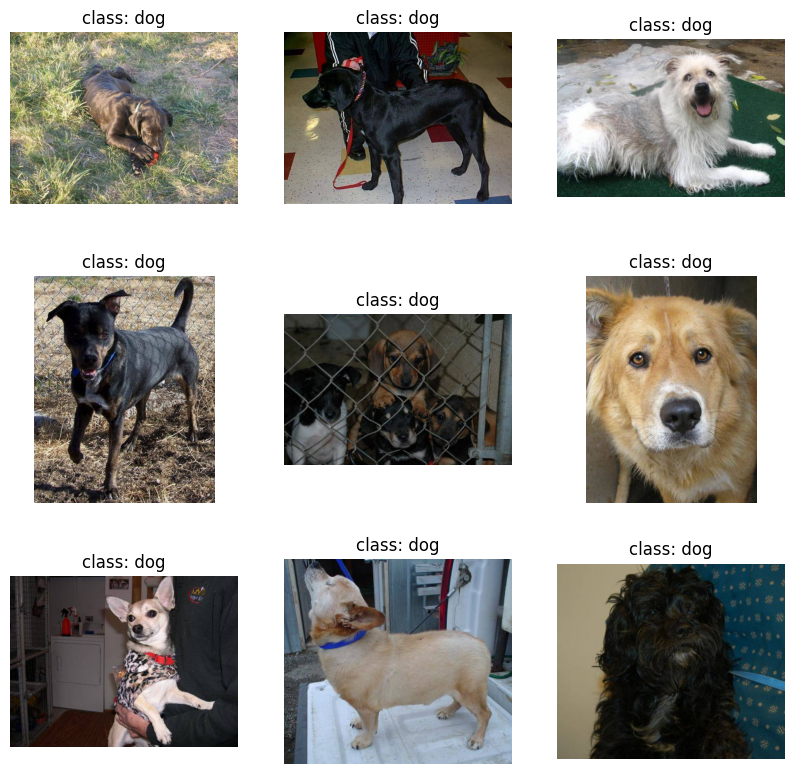

In [ ]:
dog_path = '/content/dogs_vs_cats/train/dogs'
animal_class = 'dog'
plot_images_from_dir(dog_path, animal_class)

#**Data Analysis**

In [ ]:

def drop_corrupt_imgs(main_dir, image_extensions):          # acceptable image_extensions
    invalid_imgs = 0
    for sub_dir in os.listdir(main_dir):                        # go to test and train
        train_test_path = os.path.join(main_dir, sub_dir)
        for animal in os.listdir(train_test_path):             # go to dogs and cats
            animal_path = os.path.join(train_test_path, animal)
            for file_name in os.listdir(animal_path):        # go to img files
                file_path = os.path.join(animal_path, file_name)
                try:
                    file_type = imghdr.what(file_path)      # get type of current file
                    if file_type not in image_extensions:
                        invalid_imgs += 1
                        os.remove(file_path)
                except:
                    invalid_imgs += 1
                    os.remove(file_path)

    print(f"{invalid_imgs} images were corrupted and thus removed")

image_extensions = ['jpeg', 'jpg', 'png']
data_dir = '/content/dogs_vs_cats'
drop_corrupt_imgs(data_dir, image_extensions)

0 images were corrupted and thus removed


Text(0.5, 1.0, 'distribution of dog and cat imgs')

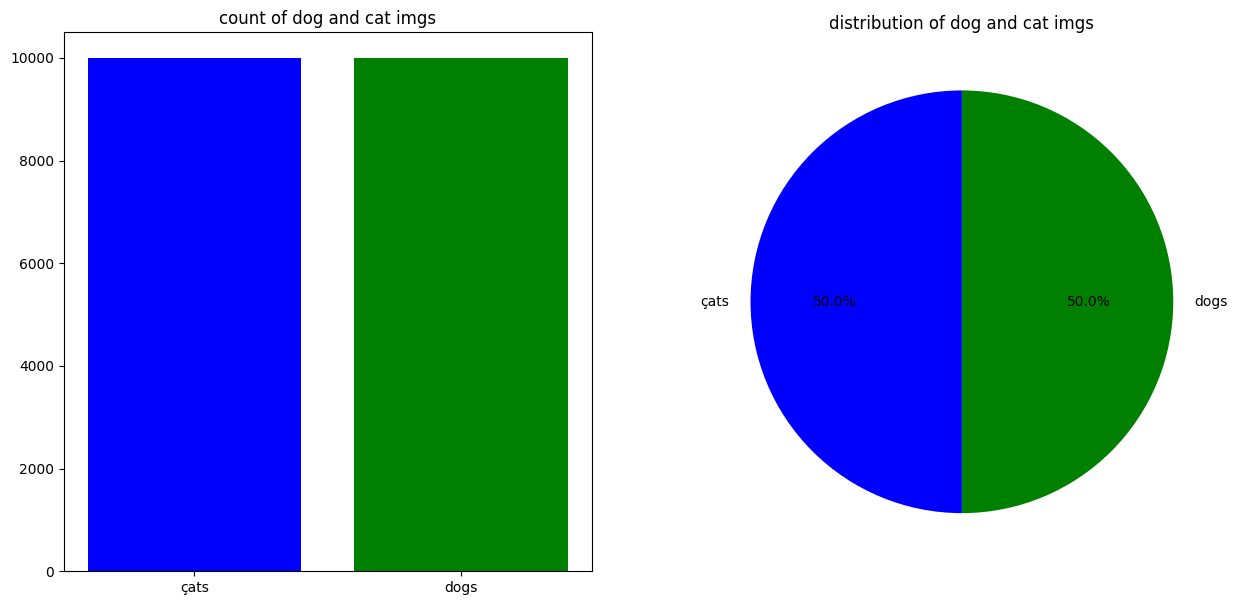

In [ ]:
cat_imgs = os.listdir(cat_path)
dog_imgs = os.listdir(dog_path)

labels = ['çats', 'dogs']
count = [len(cat_imgs), len(dog_imgs)]

fig, axes = plt.subplots(1,2,figsize=(15,7))
axes[0].bar(x = labels, height=count, color=['blue', 'green'])
axes[0].set_title('count of dog and cat imgs')

axes[1].pie(x = count, labels=labels, colors=['blue', 'green'], autopct = '%1.1f%%', startangle=90)  # autopct is the percentage written inside
axes[1].set_title('distribution of dog and cat imgs')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')